In [ ]:
!pip install dfply

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from collections import defaultdict
from dfply import *
from scipy.cluster.hierarchy import dendrogram
import matplotlib

# Hierarchical Clustering

Hierarchical Clustering is particularly useful for discovering latent taxonomies in exploratory data analysis due to its flexibility and ability to reveal the inherent structure of the data without pre-specifying the number of clusters. It is ideal for applications where understanding the hierarchical relationships between clusters is important, such as taxonomy creation, gene expression analysis, and document clustering.

The dataset for this lab can be found in [this folder](https://github.com/InzamamRahaman/MathForMLSus/tree/master/week5). You are to download the load the `city_temperature.csv` dataset for this lab.

In [ ]:
# this dataset contains the average daily temperature across several cities across the world
# every day for several years. One potential use case of Hierarchical Clustering here is to
# help us determine, organically from the data, a climate taxanomy of cities
city_temps_across_year = pd.read_csv('city_temperature.csv')

<ipython-input-16-81e24ff766b6>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  city_temps_across_year = pd.read_csv('city_temperature.csv')


In [ ]:
city_temps_across_year.head(10)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
5,Africa,Algeria,NaN,Algiers,1,6,1995,48.7
6,Africa,Algeria,NaN,Algiers,1,7,1995,48.9
7,Africa,Algeria,NaN,Algiers,1,8,1995,49.1
8,Africa,Algeria,NaN,Algiers,1,9,1995,49.0
9,Africa,Algeria,NaN,Algiers,1,10,1995,51.9


In [ ]:
print('Number of unique cities ', len(set(city_temps_across_year.City)))

Number of unique cities  321


In [ ]:
# drop fields we don't need
city_temps_across_year_reduced = city_temps_across_year.drop(['Region', 'Country', 'State'], axis=1)

# Compute the average temperature for every city-month pair across all of the years
city_temps_across_months = city_temps_across_year_reduced.groupby(['City', 'Month']).agg({'AvgTemperature': 'mean'}).reset_index()

In [ ]:
city_temps_across_months.head(10)

,City,Month,AvgTemperature
0,Abidjan,1,74.431266
1,Abidjan,2,75.821088
2,Abidjan,3,79.926427
3,Abidjan,4,77.242564
4,Abidjan,5,78.142640
5,Abidjan,6,72.168933
6,Abidjan,7,70.482839
7,Abidjan,8,73.145161
8,Abidjan,9,73.064000
9,Abidjan,10,79.626323


In [ ]:
# Right now our dataset is listed in terms of city and month
# However, we want to characterise the cities in terms of their temperatures across the months of the year
# This is best done using a Pivot table (https://en.wikipedia.org/wiki/Pivot_table)
# The Dplyr library provides additional methods for the succint manipulation of
# Pandas dataframes. We use it here to convert data into a pivot table format


city_temps_across_months_pivoted = city_temps_across_months >> group_by(X.City) >> summarise(
    Jan=X.AvgTemperature[X.Month == 1].mean(),
    Feb=X.AvgTemperature[X.Month == 2].mean(),
    Mar=X.AvgTemperature[X.Month == 3].mean(),
    Apr=X.AvgTemperature[X.Month == 4].mean(),
    May=X.AvgTemperature[X.Month == 5].mean(),
    Jun=X.AvgTemperature[X.Month == 6].mean(),
    Jul=X.AvgTemperature[X.Month == 7].mean(),
    Aug=X.AvgTemperature[X.Month == 8].mean(),
    Sept=X.AvgTemperature[X.Month == 9].mean(),
    Oct=X.AvgTemperature[X.Month == 10].mean(),
    Nov=X.AvgTemperature[X.Month == 11].mean(),
    Dec=X.AvgTemperature[X.Month == 12].mean()
)

In [ ]:
city_temps_across_months_pivoted.head()

,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,Abidjan,74.431266,75.821088,79.926427,77.242564,78.142640,72.168933,70.482839,73.145161,73.064000,79.626323,73.298667,73.917010
1,Abilene,44.661042,48.935374,56.533127,64.633333,72.460279,77.648400,83.410710,82.541161,75.680933,65.830710,54.590133,44.587887
2,Abu Dhabi,66.038089,69.240408,74.353598,80.914359,88.488325,92.023600,96.446581,96.470581,91.776533,85.837935,76.617867,68.759794
3,Addis Ababa,18.053722,30.645306,27.794293,19.662436,20.103939,22.750667,20.884774,29.490323,32.118800,30.286581,35.161867,19.769231
4,Akron Canton,26.981390,29.519592,37.888586,49.582821,60.356853,68.041467,72.571613,70.736774,64.121733,52.941032,41.420400,31.454194


In [ ]:
sampled_data = city_temps_across_months_pivoted.sample(50) # sample 50 cities at random for demonstration

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scale data to make it easier to Cluster
scaler = MinMaxScaler()
temperatures_across_year = sampled_data.loc[:,'Jan':]
city = sampled_data['City']
scaled_temperatures = scaler.fit_transform(temperatures_across_year)

# train clustering model
model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(scaled_temperatures)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
# get labels out
clusters = model.labels_

In [ ]:
sampled_data['CLUSTER'] = clusters

In [ ]:
sampled_data.head(30)

,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,CLUSTER
139,Helsinki,23.515757,23.542993,29.129032,39.710769,50.177919,58.462133,64.661935,61.689806,52.783600,42.620516,34.073600,27.370490,36
159,La Paz,46.822084,46.959048,46.862407,45.635128,42.795685,40.603200,40.568903,42.350323,43.896933,47.094581,47.380267,47.326031,31
10,Amarillo,37.118238,40.189252,48.331514,55.562821,66.105584,74.221867,79.082194,76.886710,69.592667,58.069548,46.441067,36.593806,46
210,Norfolk,41.763275,43.897279,49.475310,58.141923,67.339848,74.515333,79.721419,77.934194,73.142933,63.567226,52.768000,45.365806,41
94,Denver,26.082878,27.334558,40.847767,47.193205,56.368274,66.846667,74.408387,71.704387,63.615600,50.603742,39.622000,29.979097,45
52,Brisbane,76.265757,75.902721,74.088213,69.383846,63.363071,59.395200,58.723742,60.118710,64.600400,69.168774,71.599733,73.880412,33
36,Billings,26.746774,28.522041,36.858561,44.048077,52.624873,61.395467,74.100000,71.599097,60.890800,47.907097,36.455067,26.524516,37
171,Lome,74.125310,74.396735,79.831762,79.403462,74.502411,69.504133,72.105290,58.917935,66.940933,73.220000,67.470133,67.689304,26
29,Beijing,25.692680,32.277959,45.056700,58.477179,69.028807,76.046667,80.536258,77.954194,68.777333,55.802581,39.709467,28.096521,22
57,Buenos Aires,74.831514,73.057007,69.320347,62.754231,55.785279,50.660533,50.452258,53.484129,55.800133,62.319097,67.112667,71.519072,43


In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



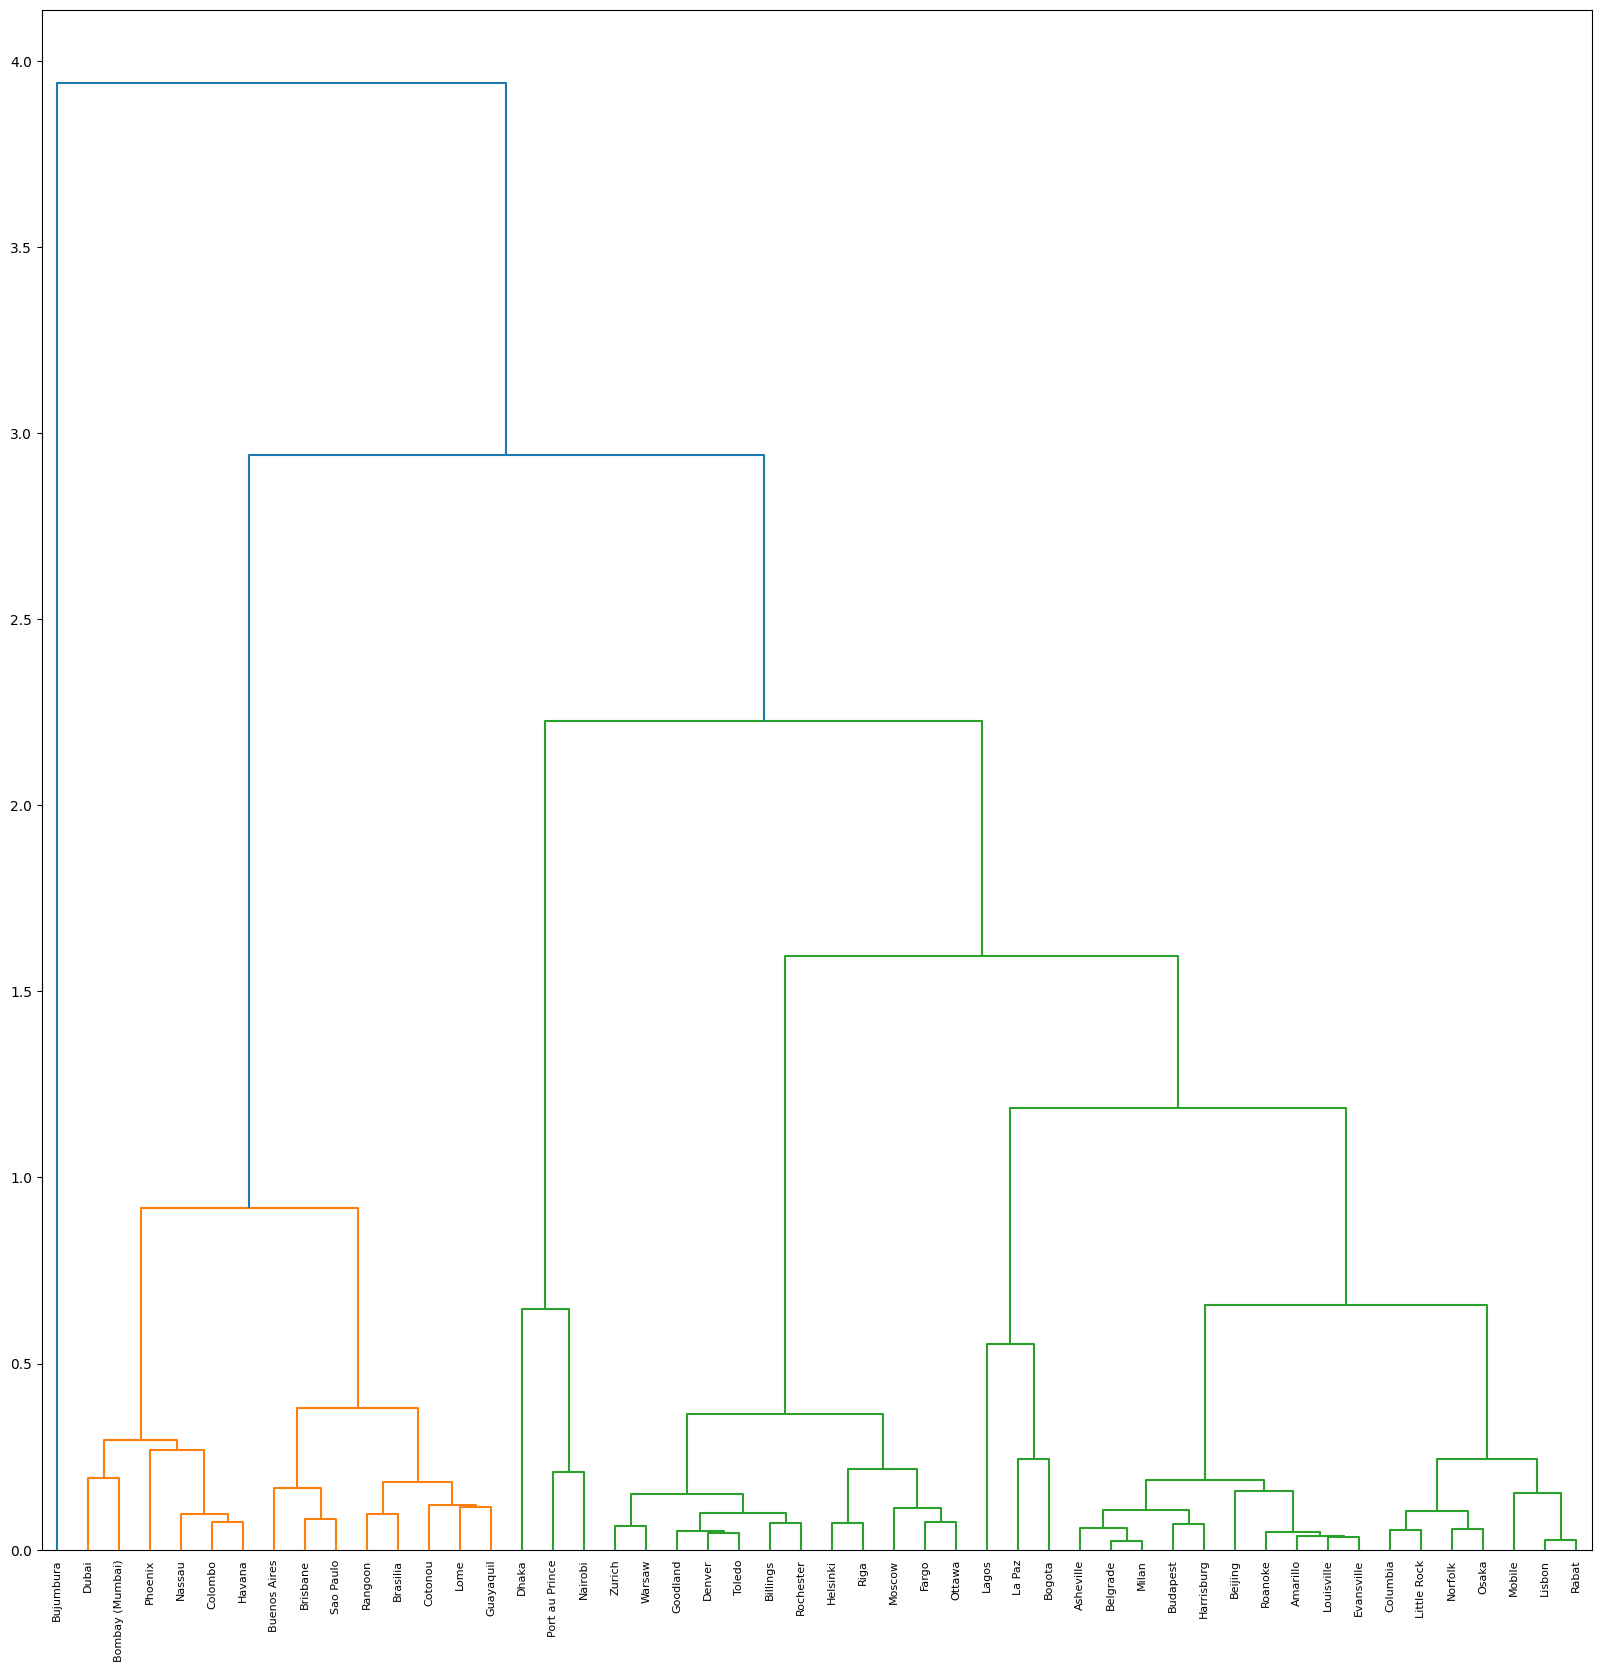

In [ ]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
plot_dendrogram(model, labels=list(city), ax=ax)

As we can see above, we have induced a taxonomy on our data based on the city's climate data! This is very useful for guiding additional scientific analysis